In [11]:
install.packages('reshape')


The downloaded binary packages are in
	/var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T//Rtmpdt7mdx/downloaded_packages


In [20]:
library(ggplot2)
library(reshape)
library(showtext)



In [43]:
#font.files()

font_add("Microsoft YaHei", "/Users/datalab/Library/Fonts/msyh.ttf")
## Automatically use showtext to render text for future devices
showtext_auto()


In [52]:
r2<-read.csv("RQ2.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
r2<-read.csv("RQ3-2.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
r2<-read.csv("RQ3-3.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
r2c<-read.csv("RQ3C.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
r2d<-read.csv("RQ3D.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)


In [53]:
reshape_data = function(dt){
  dt$time = 1:nrow(dt)
  dt= melt(dt, id = c("time"))
  dt = subset(dt, is.na(dt$value)==FALSE)
  return(dt)
}

In [54]:
r2c = reshape_data(r2c)
r2d = reshape_data(r2d)
r2c$Group = '强参考群体'
r2d$Group = '弱参考群体'
dat = rbind(r2c, r2d)


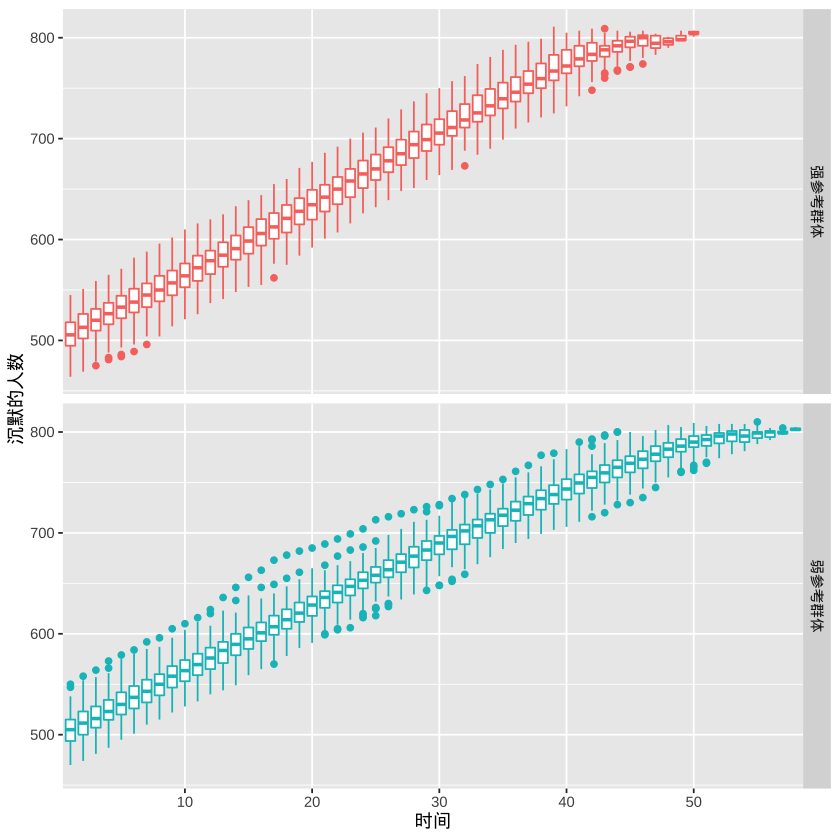

In [55]:

a = ggplot(dat, aes(x=as.factor(time), y=value, color= Group))+
  geom_boxplot(position = position_dodge(width = .9))+ 
  xlab("时间")+ylab("沉默的人数") +
  scale_x_discrete(breaks=c(1:6)*10, 
                   labels=c("10", "20", "30","40", "50", "60"))
  #theme_bw(base_family = 'MicrosoftYaHei', base_size = 12)

a + facet_grid(Group ~ .) + theme(legend.position = "none")



## 图9-4

In [74]:
p1000<-read.csv("RQ5P1000.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
p1500<-read.csv("RQ5P1500.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
p2000<-read.csv("RQ5P2000.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)

p1000 = reshape_data(p1000)
p1500 = reshape_data(p1500)
p2000 = reshape_data(p2000)

p1000$Group = 'P = 1000'
p1500$Group = 'P = 1500'
p2000$Group = 'P = 2000'

dat = rbind(p1000, p1500, p2000)

In [75]:
pdf("图9-4.pdf", width=8, height=6,)

a = ggplot(dat)+ 
  geom_boxplot(aes(x=as.factor(time), y=value, color= Group),
               position = position_dodge(width = .9),
               outlier.shape=NA)+
  scale_x_discrete(breaks=c(50, 100, 150, 200), 
                   labels=c("50", "100", "150", "200"))+
  xlab("时间")+ylab("沉默的人数") 
  #theme_bw(base_family = 'STHeiti', base_size = 14) #+facet_wrap(~Group)
c <- a + facet_grid(Group ~ .) + theme(legend.position = "none")
c
dev.off()

quartz_off_screen 
                2

## 图9-3

In [70]:
g2<-read.csv("RQ4V2.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
g4<-read.csv("RQ4V4.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
g6<-read.csv("RQ4V6.CSV",  header = T, sep = ",", stringsAsFactor=TRUE)
g2 = reshape_data(g2)
g4 = reshape_data(g4)
g6 = reshape_data(g6)
g2$Group = '观察半径 = 2'
g4$Group = '观察半径 = 4'
g6$Group = '观察半径 = 6'
dat = rbind(g2, g4, g6)

In [73]:
pdf("图9-3.pdf", width=8, height=6,)

a = ggplot(dat)+ 
  geom_boxplot(aes(x=as.factor(time), y=value, color= Group),
               position = position_dodge(width = .9),
               outlier.shape=NA)+
  scale_x_discrete(breaks=c(50, 100, 150, 200), 
                   labels=c("50", "100", "150", "200"))+
  xlab("时间")+ylab("沉默的人数") 
  #theme_bw(base_family = 'STHeiti', base_size = 14) #+facet_wrap(~Group)

c <- a + facet_grid(Group ~ .) + theme(legend.position = "none")
c
dev.off()


quartz_off_screen 
                2